<a href="https://colab.research.google.com/github/sahilfaizal01/Semantic-Search-over-YT-Videos/blob/main/Data_Exploration_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import polars as pl
import matplotlib.pyplot as plt

In [66]:
df = pl.read_parquet('video-transcripts.parquet')

In [67]:
# shape + unique values
print("shape:", df.shape)
print("n unique rows:", df.n_unique())
for j in range(df.shape[1]):
    print("n unique elements (" + df.columns[j] + "):", df[:,j].n_unique())

shape: (510, 4)
n unique rows: 505
n unique elements (video_id): 505
n unique elements (datetime): 505
n unique elements (title): 505
n unique elements (transcript): 499


In [68]:
print("Total number of title characters:", sum(len(df['title'][i]) for i in range(len(df))))
print("Total number of transcript characters:", sum(len(df['transcript'][i]) for i in range(len(df))))

Total number of title characters: 28548
Total number of transcript characters: 943362


# **Checking Dtypes**

In [69]:
# change datetime to Datetime dtype
df = df.with_columns(pl.col('datetime').cast(pl.Datetime))
print(df.head())

shape: (5, 4)
┌─────────────┬─────────────────────┬───────────────────────────────┬──────────────────────────────┐
│ video_id    ┆ datetime            ┆ title                         ┆ transcript                   │
│ ---         ┆ ---                 ┆ ---                           ┆ ---                          │
│ str         ┆ datetime[μs]        ┆ str                           ┆ str                          │
╞═════════════╪═════════════════════╪═══════════════════════════════╪══════════════════════════════╡
│ XT0WblJZqSo ┆ 2024-07-04 20:00:09 ┆ Sheldon Gets Fired | The Big  ┆ Here Comes our new boss be   │
│             ┆                     ┆ Ban…                          ┆ polit…                       │
│ P2A82K1sG48 ┆ 2024-07-04 12:00:21 ┆ Nerds and Their Moms | The    ┆ you guys need me to call     │
│             ┆                     ┆ Big B…                        ┆ someone…                     │
│ looMyVTPOn8 ┆ 2024-07-04 07:00:21 ┆ Funny Moments from Seasons 11 ┆ hello L

# **Character Counts**

(array([  8.,  70., 126., 137., 110.,  43.,   8.,   6.,   0.,   2.]),
 array([ 29.,  37.,  45.,  53.,  61.,  69.,  77.,  85.,  93., 101., 109.]),
 <BarContainer object of 10 artists>)

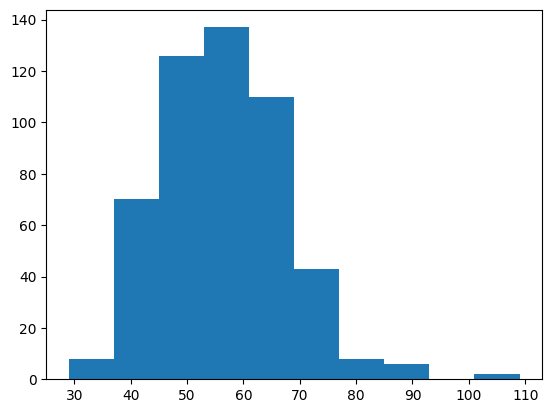

In [70]:
# lengths/character counts
plt.hist(df['title'].str.len_chars())

(array([448.,  24.,  12.,  11.,   6.,   3.,   3.,   1.,   1.,   1.]),
 array([3.0000e+00, 2.9370e+03, 5.8710e+03, 8.8050e+03, 1.1739e+04,
        1.4673e+04, 1.7607e+04, 2.0541e+04, 2.3475e+04, 2.6409e+04,
        2.9343e+04]),
 <BarContainer object of 10 artists>)

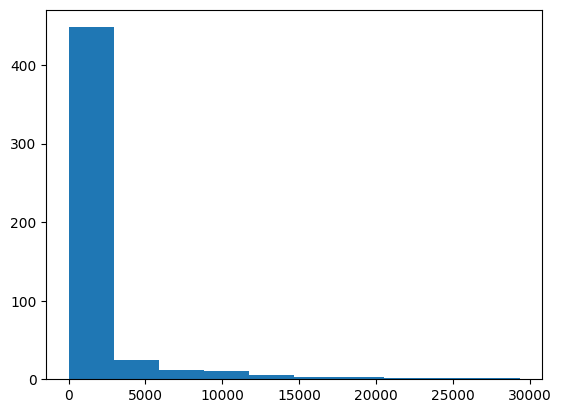

In [71]:
plt.hist(df['transcript'].str.len_chars())